**Partie 1 — Régression en action**

Exercice 1 :

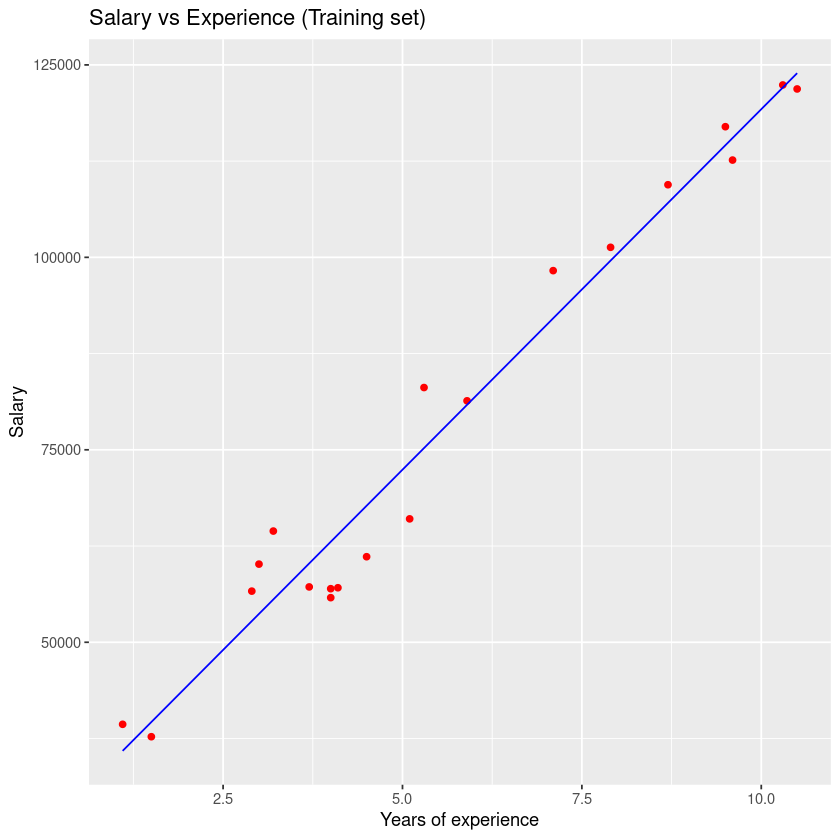

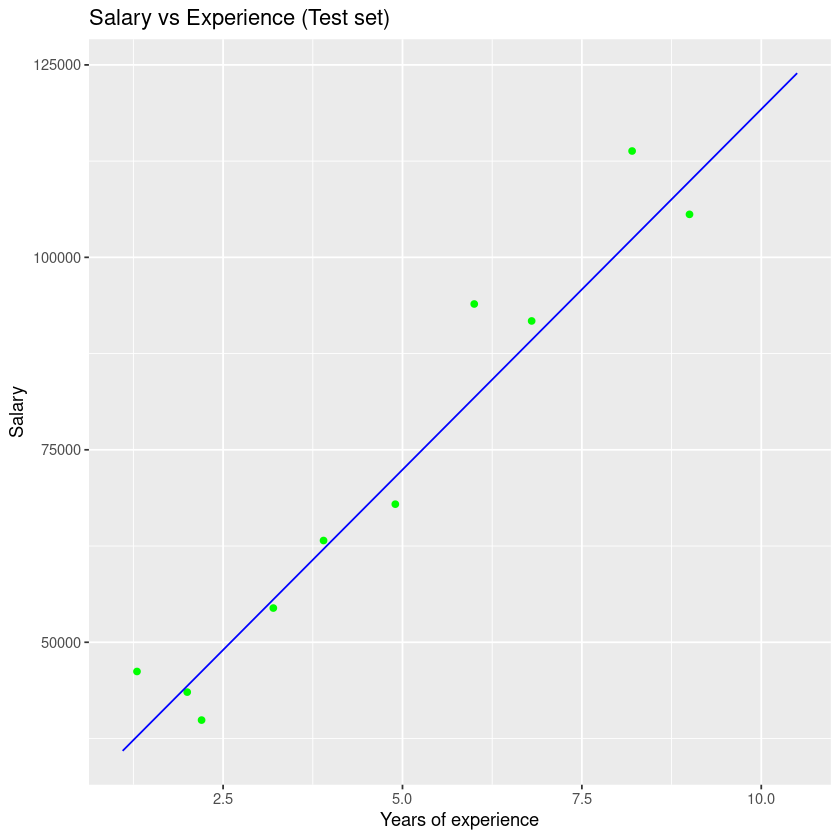

In [21]:

dataset = read.csv('Salary_Data.csv') 

library(caTools) 
 
 set.seed(123) 
split = sample.split(dataset$Salary, SplitRatio = 2/3) 
training_set = subset(dataset, split == TRUE) 
test_set = subset(dataset, split == FALSE) 
 
regressor = lm(formula = Salary ~ YearsExperience, data = training_set) 
y_pred = predict(regressor, newdata = test_set) 
 

library(ggplot2) 
 
ggplot() + 
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary), 
        colour = 'red') + 
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = 
 training_set)), colour = 'blue') + 
  ggtitle('Salary vs Experience (Training set)') +  xlab('Years of experience') + 
    ylab('Salary')

ggplot() + 
    geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary), 
   colour = 'green') + 
    geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = 
   training_set)), colour = 'blue') + 
    ggtitle('Salary vs Experience (Test set)') + 
    xlab('Years of experience') + 
    ylab('Salary')


Exercice 2 :

In [25]:

dataset = read.csv('50_Startups.csv') 
 

dataset$State = factor(dataset$State, 
                       levels = c('New York', 'California', 'Florida'), 
                       labels = c(1, 2, 3)) 

 
library(caTools) 
set.seed(123) 
split = sample.split(dataset$Profit, SplitRatio = 0.8) 
training_set = subset(dataset, split == TRUE) 
test_set = subset(dataset, split == FALSE) 
 
regressor = lm(formula = Profit ~ ., data = training_set) 
 
y_pred = predict(regressor, newdata = test_set)

print(y_pred)
 


        4         5         8        11        16        20        21        24 
173981.09 172655.64 160250.02 135513.90 146059.36 114151.03 117081.62 110671.31 
       31        32 
 98975.29  96867.03 


Exercice 3 :

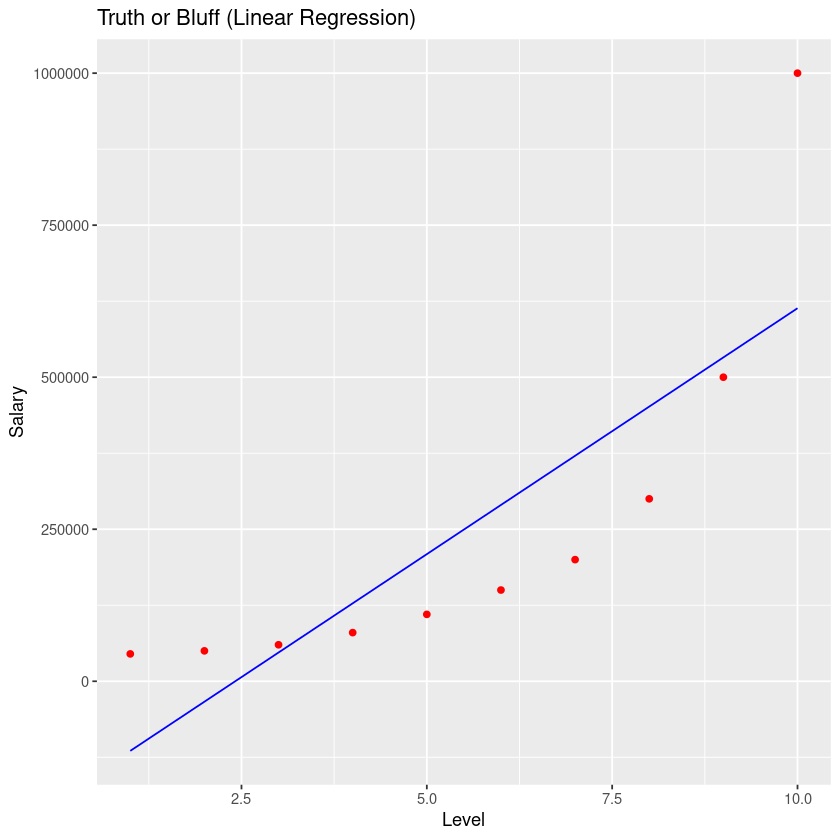

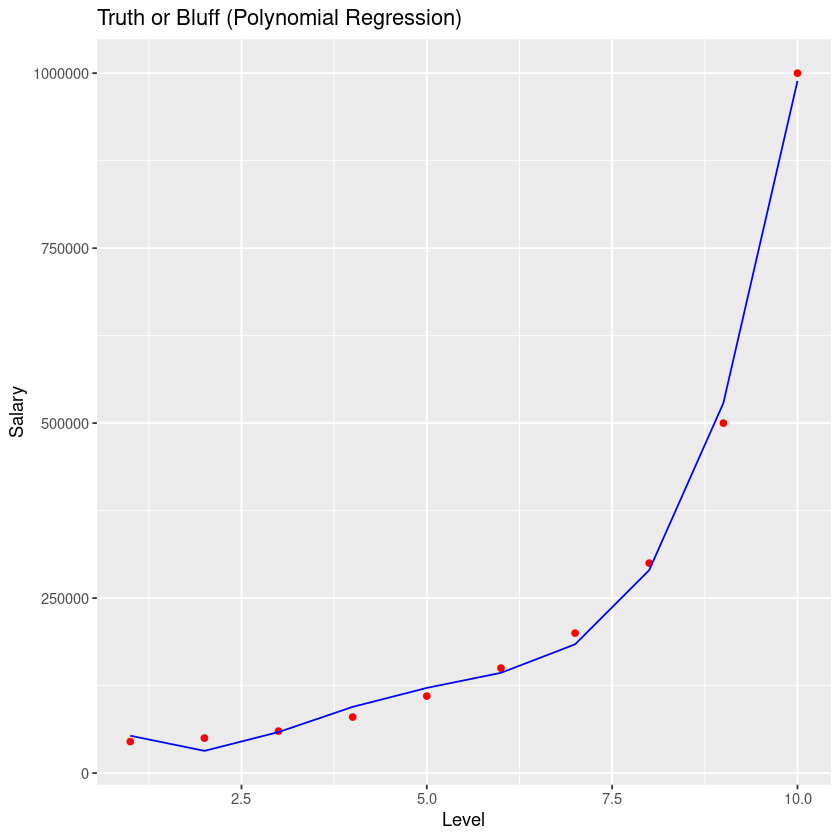

1 
330378.8

1 
158862.5

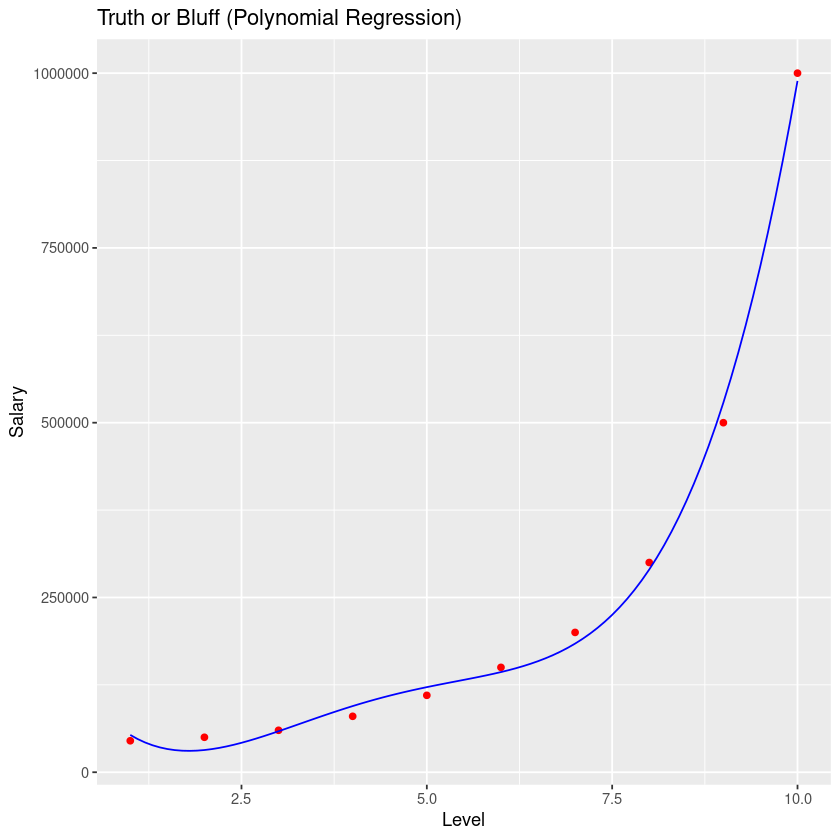

In [2]:

dataset = read.csv('Position_Salaries.csv') 
dataset = dataset[2:3]
lin_reg = lm(formula = Salary ~ ., data = dataset) 
 
dataset$Level2 = dataset$Level^2 
dataset$Level3 = dataset$Level^3 
dataset$Level4 = dataset$Level^4 
poly_reg = lm(formula = Salary ~ ., 
              data = dataset) 
 

library(ggplot2) 
ggplot() + 
  geom_point(aes(x = dataset$Level, y = dataset$Salary), 
             colour = 'red') + 
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)), 
            colour = 'blue') + 
  ggtitle('Truth or Bluff (Linear Regression)') + 
  xlab('Level') + 
  ylab('Salary') 
 
library(ggplot2) 
ggplot() + 
  geom_point(aes(x = dataset$Level, y = dataset$Salary), 
             colour = 'red') + 
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)), 
            colour = 'blue') + 
  ggtitle('Truth or Bluff (Polynomial Regression)') + 
  xlab('Level') + 
  ylab('Salary') 
 
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1) 
ggplot() + 
  geom_point(aes(x = dataset$Level, y = dataset$Salary), 
             colour = 'red') + 
  geom_line(aes(x = x_grid, y = predict(poly_reg, 
                                        newdata = data.frame(Level = x_grid, 
                                                             Level2 = x_grid^2, 
                                                             Level3 = x_grid^3, 
                                                             Level4 = x_grid^4))), 
            colour = 'blue') + 
  ggtitle('Truth or Bluff (Polynomial Regression)') + 
xlab('Level') + 
  ylab('Salary') 
 predict(lin_reg, data.frame(Level = 6.5)) 
 predict(poly_reg, data.frame(Level = 6.5, 
                             Level2 = 6.5^2, 
                             Level3 = 6.5^3, 
                             Level4 = 6.5^4))